<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/%5BNLP_%EC%96%B8%EC%A0%9C%EA%B9%8C%EC%A7%80_%EB%AF%B8%EB%A3%B0%EB%9E%98__%EC%9D%BC%EB%8B%A8_%EB%93%A4%EC%96%B4%EC%99%80!!%5D_4_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*총 5개의 노트북으로 시작하는 자연어 처리 입문 튜토리얼*


*이번 대회와 함께 그간 미루고 있었던 NLP, 지금 시작해보세요!!*

# 튜토리얼 목차

1. 자연어 처리란?


2. NLP Preprocessing


3. Vectorization


### 4. Embedding <<<<


5. Modeling

---

## Embedding이란?

* 앞에서 살펴보았던 vectorization의 치명적인 단점은 바로 단어나 문장들 사이의 관계에 대해서 설명하지 못한다는 것입니다. 다음과 같은 예시를 들어보겠습니다.

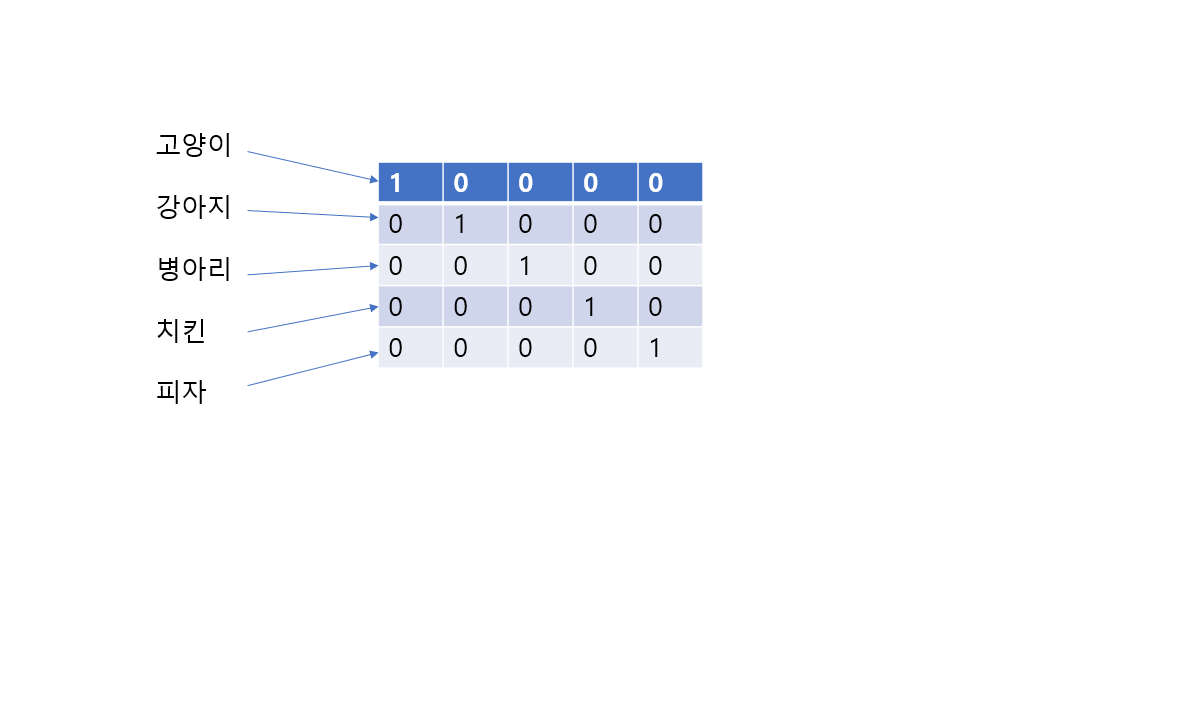</img><br/>

* one hot encoding을 통해 각 5개의 토큰들이 고유의 벡터를 갖게 되었습니다. 하지만 뭔가 이상하지 않나요? 사람이 보기에는 5개의 토큰들이 너무나도 명확하게 구분 됩니다. 지금까지 살펴 본 벡터화 방법들은 단어의 중요도나 문서 안에서의 중요도는 구분 할 수 있지만 단어 사이의 유사도는 구별할 수 없었습니다.

* 이 때 사용되는 것이 Embedding 기법이며 word2vec을 비롯한 다양한 임베딩 기법들이 존재합니다. 대략적인 아이디어는 다음과 같습니다. 

> 의미가 유사한 토큰들은 가깝게 임의의 차원에 뿌려보자!!

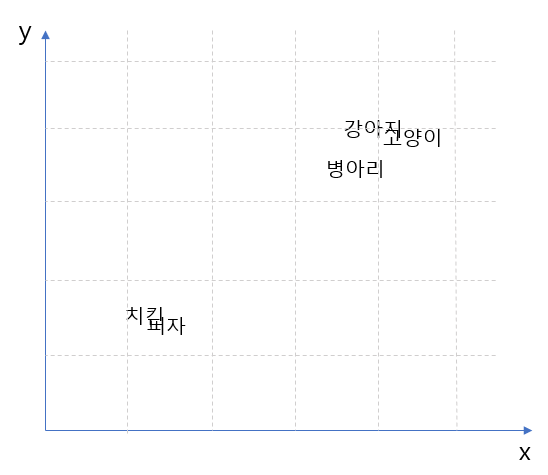</img><br/>

* 위의 예시처럼 비슷한 의미를 내포하고 있는 토큰들은 서로 가깝게, 그렇지 않은 토큰들은 서로 멀리 뿌리도록 하는 것이 임베딩의 목적입니다. 검색 시스템, 감성 분석 등에서는 훌륭한 임베딩을 수행하는 것이 전체 문제 해결에 많은 영향을 줍니다.


* 임베딩 또한 하나의 모델을 의미하며 훈련이 필요합니다. 데이터가 충분하고 시간이 많으면 소지한 데이터에 특화된 임베딩 모델을 학습시킬 수 있습니다. 보통은 pre_trained embedding model을 가져와서 사용합니다.

## 1.Keras Embedding Layer

* 기본적으로 가장 쉽고 빠르게 네트워크 모델에 임베딩 층을 주입할 수 있는 방식입니다. 이 방법은 무작위로 특정 차원으로 입력 벡터들을 뿌린 후 학습을 통해 가중치들을 조정해 나가는 방식입니다. <span style="color:red"> 즉, 단어 사이의 관계를 반영하는 방법이 아닙니다. </span>



* 적용은 아래와 같이 매우 간단하게 keras 코드로 구현할 수 있습니다.

In [1]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length = max_len))

NameError: ignored

---

## 2. word2vec

* word2vec의 핵심 아이디어는 `"친구를 보면 그 사람을 알 수 있다"`입니다. 주변 단어와의 관계를 통해 해당 단어의 의미적 특성을 파악합니다. 자세한 내용은 다음 링크를 참조해 주세요.([word2vec](https://dreamgonfly.github.io/blog/word2vec-explained/))

* word2vec embedding matrix를 kears의 embedding에 주입하는 과정은 다음과 같습니다.

1. 구글의 사전 훈련된 word2vec bin 파일을 다운로드 합니다.([다운로드 링크](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit))

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:20px; height:20px;"></img><br/>

2. gensim 모듈과 bin파일을 활용해 word2vec 모델을 로드합니다.

In [ ]:
import gensim
word2vec = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary = True)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:20px; height:20px;"></img><br/>

3. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장합니다.

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300)) #300차원의 임베딩 매트릭스 생성

for index, word in enumerate(vocabulary): #vocabulary에 있는 토큰들을 하나씩 넘겨줍니다.
    if word in word2vec: #넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = word2vec[word] #해당 토큰에 해당하는 vector를 불러오고
        embedding_mxtrix[i] = embedding_vector #해당 위치의 embedding_mxtrix에 저장합니다.
    else:
        print("word2vec에 없는 단어입니다.")
        break

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:20px; height:20px;"></img><br/>

4. keras embedding layer에 embedding_matrix를 가중치로 주어 이용합니다.

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 300,weights = [embedding_matrx], input_length = max_len))

---

## 3. glove

* glove는 word2vec의 단점을 보완하기 위하여 등장하였습니다. word2vec이 사용자가 지정한 주변 단어의 개수에 대해서만 학습이 이루어지기 때문에 데이터 전체에 대한 정보를 담기 어렵다는 단점을 지적하였습니다. glove의 핵심 아이디어는 다음과 같습니다.

> 각 토큰들 간의 유사성은 그대로 가져가면서 데이터 전체에 대한 빈도를 반영하자

* glove embedding matrix를 keras의 embedding matrix에 주입하는 방법은 다음과 같습니다.

1. 사전 훈련된 벡터를 갖고 있는 txt 파일을 [이곳](https://drive.google.com/file/d/1yHGtccC2FV3_d6C6_Q4cozYSOgA7bG-e/view)에서 다운로드 합니다. 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:20px; height:20px;"></img><br/>

2. txt 파일에 있는 단어와 벡터들을 glove dictionary에 저장합니다.

In [ ]:
2. # load the whole embedding into memory
glove = dict()
f = open('./glove.txt')
for line in f:
    values = line.split()
    word = values[0]
    vector = asarray(values[1:], dtype='float32')
    glove[word] = vector
f.close()

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:20px; height:20px;"></img><br/>

3. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장합니다.

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300)) #300차원의 임베딩 매트릭스 생성

for index, word in enumerate(vocabulary): #vocabulary에 있는 토큰들을 하나씩 넘겨줍니다.
    if word in glove: #넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = glove[word] #해당 토큰에 해당하는 vector를 불러오고
        embedding_mxtrix[i] = embedding_vector #해당 위치의 embedding_mxtrix에 저장합니다.
    else:
        print("glove 없는 단어입니다.")
        break

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:20px; height:20px;"></img><br/>

4. keras embedding layer에 embedding_matrix를 가중치로 주어 이용합니다.

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 300,weights = [embedding_matrx], input_length = max_len))

---

## 4. Fasttext

* Fasttext의 핵심 아이디어는 단어 단위가 아닌 sub 단어를 단위로 사용합니다. 즉 다음과 같습니다.

> word2vec -> "apple" 학습


> FastText -> "ap", "pp", "pl", "le" 학습

* 따라서 미리 학습되지 않은 단어들에 대한 vector도 표현해준다는 장점이 있습니다. 이용은 다음과 같습니다.

1. 사전 훈련된 bin 파일을 [이곳](https://drive.google.com/file/d/1yHGtccC2FV3_d6C6_Q4cozYSOgA7bG-e/view)에서 다운로드 합니다.(glove에서 썼던 링크와 동일)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:20px; height:20px;"></img><br/>

2. vec 파일을 gensim을 활용하여 읽어옵니다. 

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
FastText = KeyedVectors.load_word2vec_format('./fasttext.bin', binary = True)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:20px; height:20px;"></img><br/>

3. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장합니다.

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300)) #300차원의 임베딩 매트릭스 생성

for index, word in enumerate(vocabulary): #vocabulary에 있는 토큰들을 하나씩 넘겨줍니다.
    if word in word2vec: #넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = word2vec[word] #해당 토큰에 해당하는 vector를 불러오고
        embedding_mxtrix[i] = embedding_vector #해당 위치의 embedding_mxtrix에 저장합니다.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:20px; height:20px;"></img><br/>

4. keras embedding layer에 embedding_matrix를 가중치로 주어 이용합니다.

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 300,weights = [embedding_matrx], input_length = max_len))

---

* 이렇게 word embedding에 대해서 알아보았습니다. 이제 지금까지의 지식을 바탕으로 doc2vec이 무엇인지 유추할 수 있습니다. 즉, 단어 단위가 아닌 문장 단위의 벡터를 특정 차원에 뿌리는 것입니다. doc2vec에 관해서는 이번 노트북에서 다루지 않겠지만 꼭 한번 공부해보시는 것을 추천드립니다.

* 대회에 대한 적용은 다음 모델링 노트북에서 다루도록 하겠습니다. 이제 드디어 모델링입니다!!

## To be continued......